<a href="https://colab.research.google.com/github/ArunVignesh75/Machine-Learning/blob/main/Target_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_parquet("train.parquet")
df1 = pd.read_parquet("test.parquet")

In [ ]:
df1

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [ ]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [ ]:
df.Incident.unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [ ]:
df['Patient-Uid'].unique

<bound method Series.unique of 0           a0db1e73-1c7c-11ec-ae39-16262ee38c7f
1           a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f
3           a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f
4           a0dc950b-1c7c-11ec-b6ec-16262ee38c7f
8           a0dc9543-1c7c-11ec-bb63-16262ee38c7f
                            ...                 
29080886    a0ee9f75-1c7c-11ec-94c7-16262ee38c7f
29080897    a0ee1284-1c7c-11ec-a3d5-16262ee38c7f
29080900    a0ee9b26-1c7c-11ec-8a40-16262ee38c7f
29080903    a0ee1a92-1c7c-11ec-8341-16262ee38c7f
29080911    a0ee146e-1c7c-11ec-baee-16262ee38c7f
Name: Patient-Uid, Length: 3220868, dtype: object>

In [ ]:
df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
df1.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
df1.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [ ]:
df.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [ ]:
df = df.groupby(['Patient-Uid', 'Date']).sum().reset_index().sort_values(by=['Patient-Uid', 'Date'], ascending=True)
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0DRUG_TYPE_9DRUG_TYPE_0TEST_TYPE_...
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,DRUG_TYPE_7DRUG_TYPE_0
...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG


In [ ]:
df1 = df1.groupby(['Patient-Uid', 'Date']).sum().reset_index().sort_values(by=['Patient-Uid', 'Date'], ascending=True)
df1

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-06-23,DRUG_TYPE_7
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0TEST_TYPE_0DRUG_TYPE_0PRIMARY_DI...
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-22,PRIMARY_DIAGNOSISPRIMARY_DIAGNOSIS
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-03-16,SYMPTOM_TYPE_6
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-09-12,PRIMARY_DIAGNOSISPRIMARY_DIAGNOSIS
...,...,...,...
779980,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-11-03,DRUG_TYPE_7
779981,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-11-07,DRUG_TYPE_8DRUG_TYPE_8DRUG_TYPE_13
779982,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2019-01-09,DRUG_TYPE_8DRUG_TYPE_13DRUG_TYPE_2DRUG_TYPE_7
779983,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2019-02-05,DRUG_TYPE_13DRUG_TYPE_8


In [ ]:
df1.Incident.unique()

array(['DRUG_TYPE_7',
       'SYMPTOM_TYPE_0TEST_TYPE_0DRUG_TYPE_0PRIMARY_DIAGNOSISDRUG_TYPE_11SYMPTOM_TYPE_6DRUG_TYPE_2',
       'PRIMARY_DIAGNOSISPRIMARY_DIAGNOSIS', ...,
       'DRUG_TYPE_8DRUG_TYPE_7DRUG_TYPE_5',
       'DRUG_TYPE_8DRUG_TYPE_13DRUG_TYPE_2DRUG_TYPE_7',
       'DRUG_TYPE_13DRUG_TYPE_0DRUG_TYPE_8DRUG_TYPE_2DRUG_TYPE_8'],
      dtype=object)

In [ ]:
df_target = df[['Patient-Uid', 'Date', 'Incident']]

#filter only rows where the incident is 'TARGET DRUG'
df_target = df_target[df_target['Incident'] == 'TARGET DRUG']

#create a new column with the difference between the date and the first prescription date
df_target['days_since_first_prescription'] = (df_target.groupby('Patient-Uid')['Date'].transform(min) - df_target['Date']).dt.days

#filter only rows where the difference is less than or equal to 30
df_target = df_target[df_target['days_since_first_prescription'] <= 30]

#drop the irrelevant columns
df_target.drop(['Incident', 'days_since_first_prescription'], axis=1, inplace=True)

#drop duplicate patient-uids
df_target.drop_duplicates(subset=['Patient-Uid'], keep='first', inplace=True)

#rename the dataframe
patient_id = df_target.rename(columns={'Patient-Uid': 'patient_id'})

In [ ]:
patient_id

,patient_id,Date
1318679,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2019-12-12
1318895,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2019-09-10
1319073,a0e9c4a3-1c7c-11ec-aa86-16262ee38c7f,2020-03-10
1319234,a0e9c4d2-1c7c-11ec-8183-16262ee38c7f,2019-02-21
1319658,a0e9c561-1c7c-11ec-ac1a-16262ee38c7f,2019-05-10
...,...,...
2340970,a0f0d3ab-1c7c-11ec-8e8b-16262ee38c7f,2019-09-03
2341386,a0f0d496-1c7c-11ec-ab26-16262ee38c7f,2018-07-18
2341523,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-06-16
2341696,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-06-17


In [ ]:
patient_ids = df['Patient-Uid'].unique()
patient_ids_df = pd.DataFrame(patient_ids, columns=['Patient-Uid'])

In [ ]:
patient_ids_df

,Patient-Uid
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f
...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f


In [ ]:
df['Target'] = 0

df_target = df[df['Incident'] == 'TARGET DRUG']

df_target = df_target.groupby('Patient-Uid').agg({'Date': 'min'}).reset_index()
df_target.columns = ['Patient-Uid', 'first_prescription']

df = df.merge(df_target, on='Patient-Uid', how='left')

df['days_since_first_prescription'] = (df['first_prescription'] - df['Date']).dt.days

df.loc[(df['Incident'] == 'TARGET DRUG') & (df['days_since_first_prescription'] <= 30), 'Target'] = 1

In [ ]:
df.Target.value_counts()

0    2325575
1      16302
Name: Target, dtype: int64

In [ ]:
del df['first_prescription']	

In [ ]:
del df['days_since_first_prescription']

In [ ]:
df['Target'].value_counts()

0    2325575
1      16302
Name: Target, dtype: int64

In [ ]:
columns = ['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27', 'DRUG_TYPE_18',
'SYMPTOM_TYPE_28', 'TARGET DRUG']

for column in columns:
    df[column] = 0

for index, row in df.iterrows():
    incident = row['Incident']
    for column in columns:
        if column in incident:
            df.at[index, column] = 1


In [ ]:
print(df)

                                  Patient-Uid       Date  \
0        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2015-09-22   
1        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13   
2        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02   
3        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23   
4        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-24   
...                                       ...        ...   
2341872  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-19   
2341873  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-09   
2341874  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-10   
2341875  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-05   
2341876  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08   

                                                  Incident  Target  \
0                                              DRUG_TYPE_7       0   
1                                           SYMPTOM_TYPE_2       0   
2                                              DRUG_TYPE_7       0   

In [ ]:
columns = ['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27', 'DRUG_TYPE_18',
'SYMPTOM_TYPE_28']

for column in columns:
    df1[column] = 0

for index, row in df.iterrows():
    incident = row['Incident']
    for column in columns:
        if column in incident:
            df1.at[index, column] = 1


In [ ]:
df1[''] = 0

In [ ]:
df1['Incident'] = df['Incident']

In [ ]:
df2 = df1.copy()

In [ ]:
df_unique = df.drop_duplicates(subset='Patient-Uid')
df_grouped = df.groupby('Patient-Uid').sum()
df_grouped = df_grouped.apply(lambda x: np.where(x>0, 1, 0))

In [ ]:
df_grouped

,Target,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_2,TEST_TYPE_0,DRUG_TYPE_3,DRUG_TYPE_4,DRUG_TYPE_5,...,DRUG_TYPE_16,TEST_TYPE_5,SYMPTOM_TYPE_19,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,DRUG_TYPE_18,SYMPTOM_TYPE_28,TARGET DRUG
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0,1,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_grouped.to_csv("trailer.csv")

In [ ]:
df_grouped.shape

(27033, 58)

In [ ]:
df_grouped.Target.value_counts()

0    23489
1     3544
Name: Target, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7119319f70>,
      dtype=object)

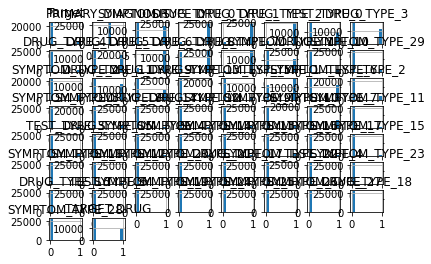

In [ ]:
df_grouped.hist()

In [ ]:
df_grouped.columns

Index(['Target', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21', 'DRUG_TYPE_17',
       'SYMPTOM_TYPE_22', 'TEST_TYPE_4', 'SYMPTOM_TYPE_23', 'DRUG_TYPE_16',
       'TEST_TYPE_5', 'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',


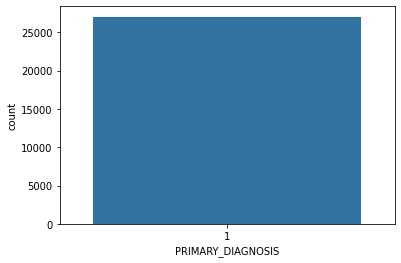

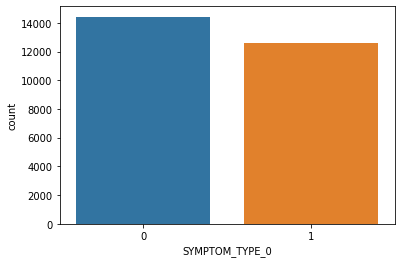

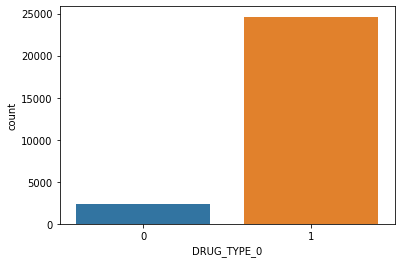

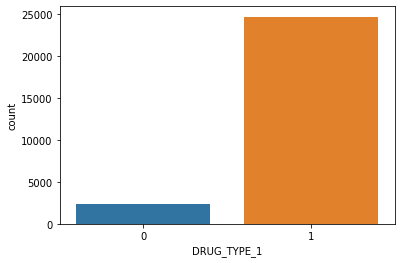

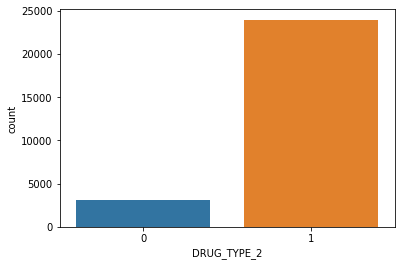

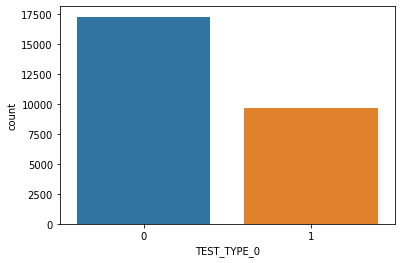

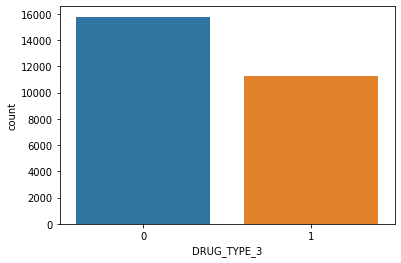

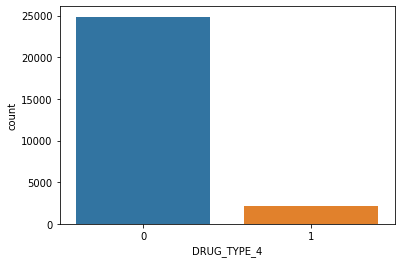

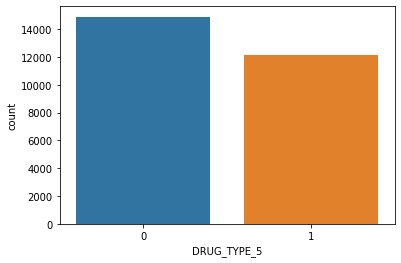

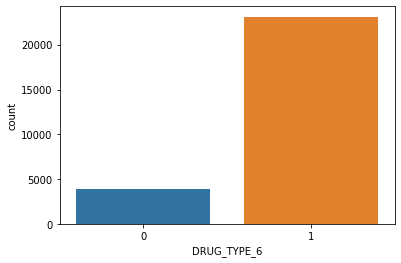

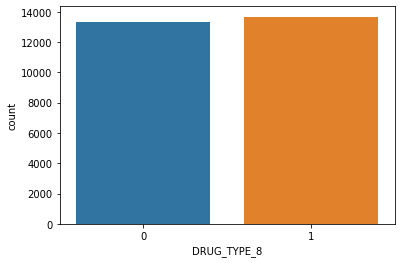

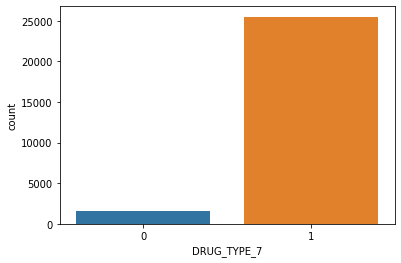

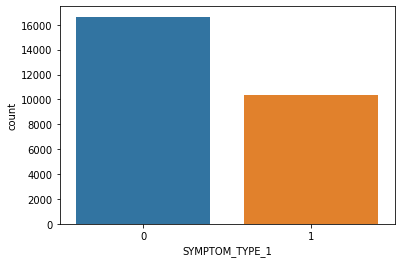

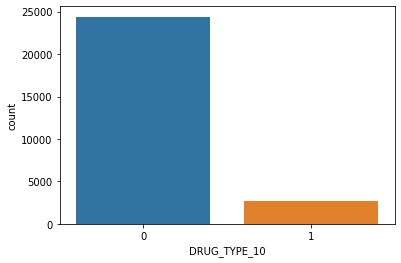

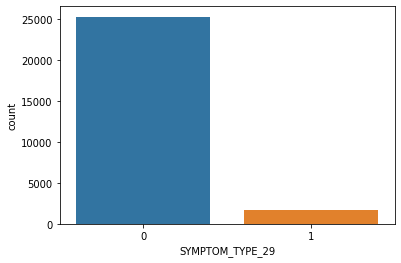

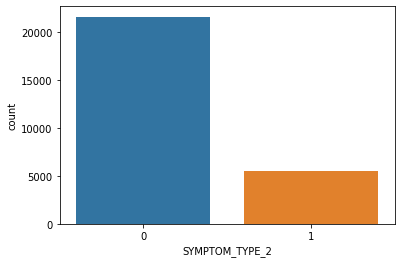

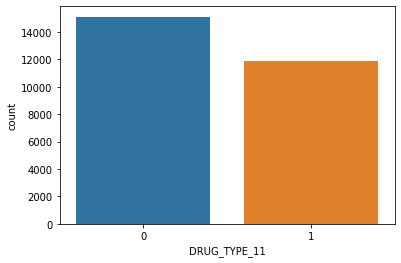

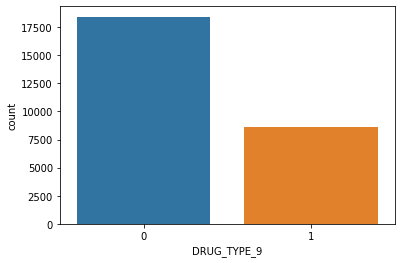

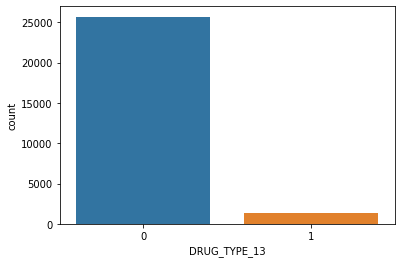

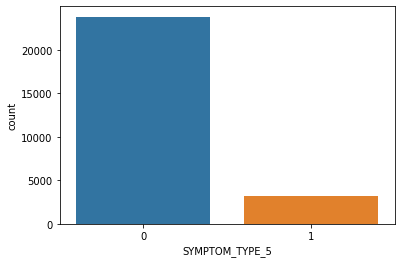

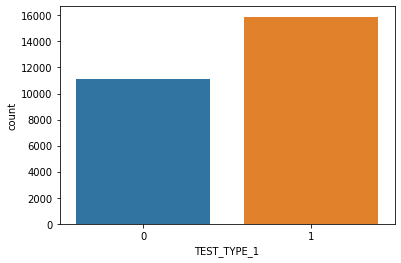

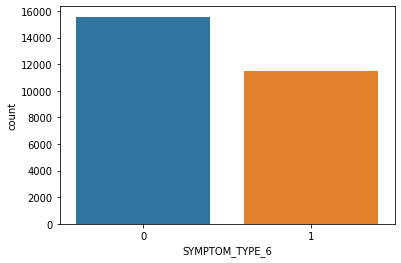

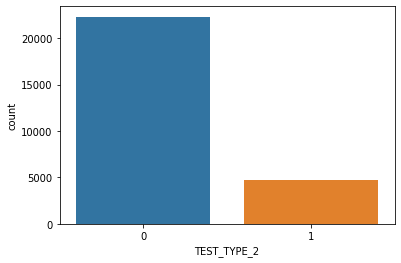

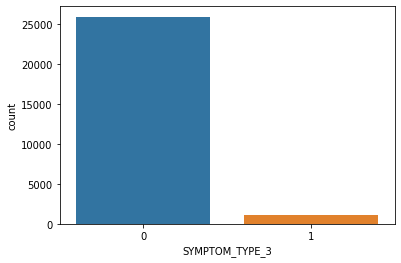

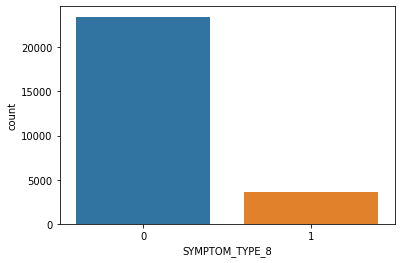

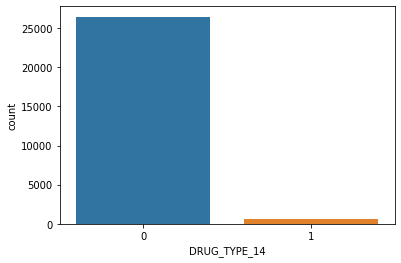

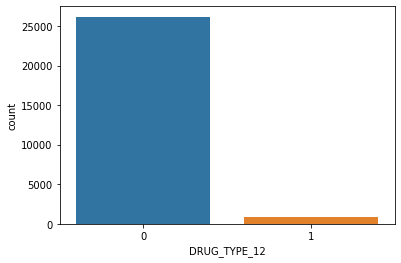

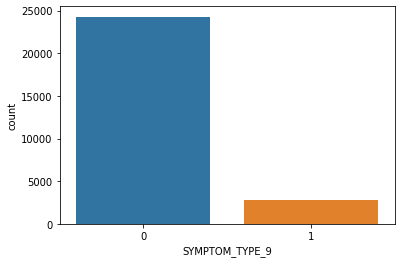

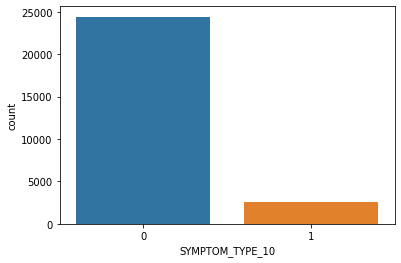

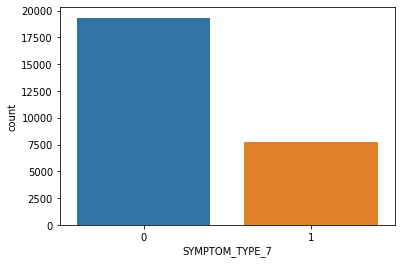

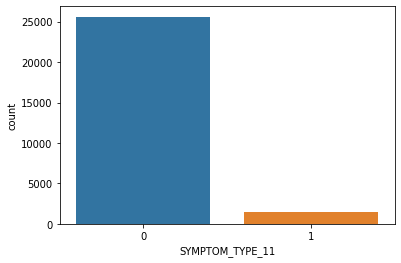

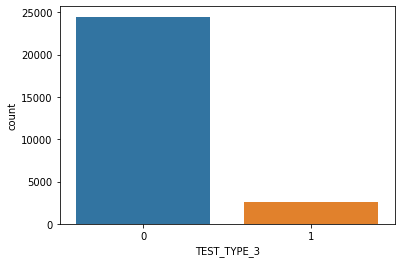

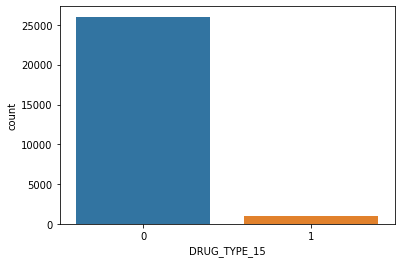

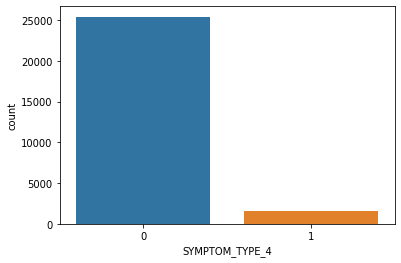

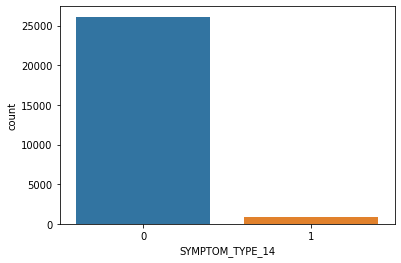

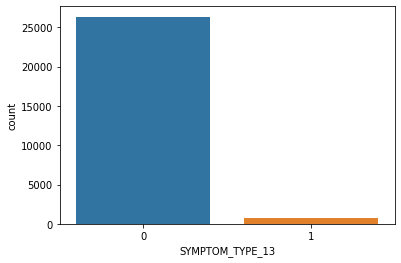

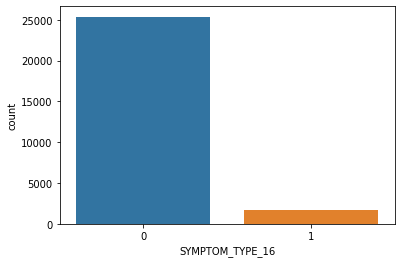

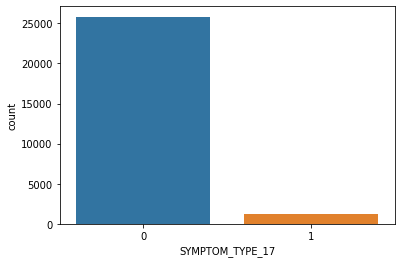

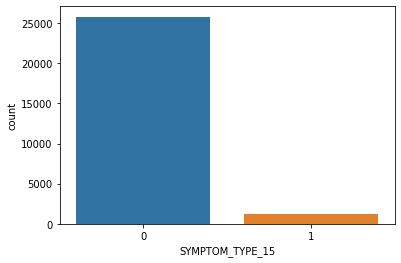

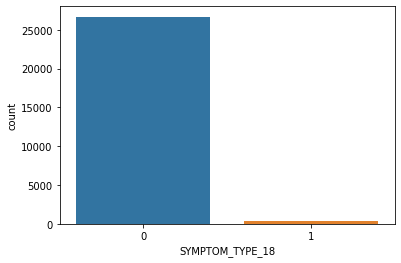

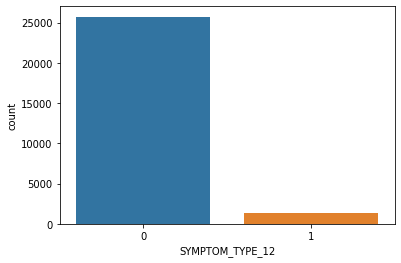

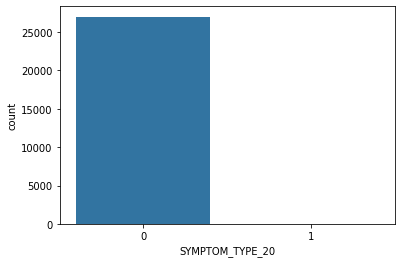

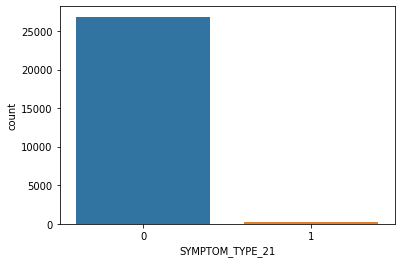

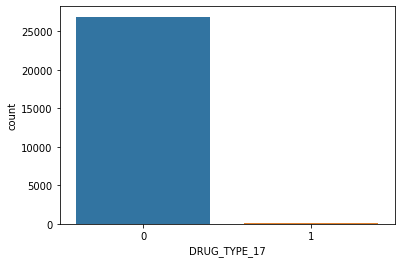

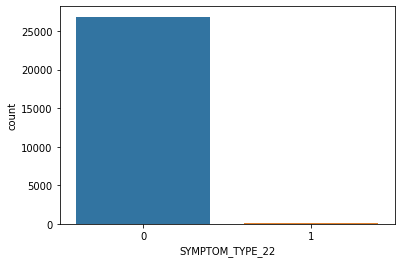

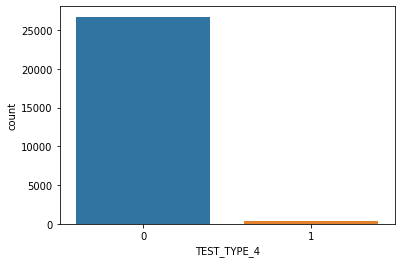

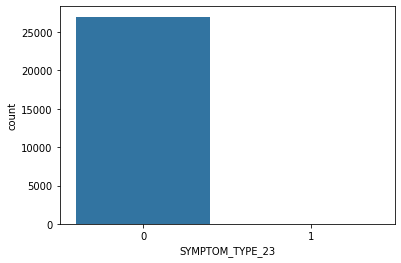

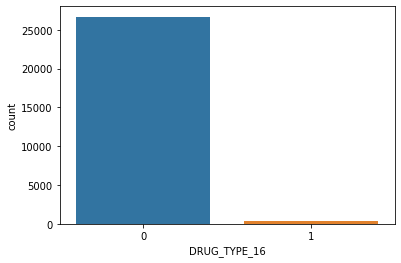

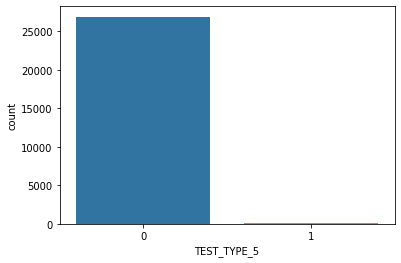

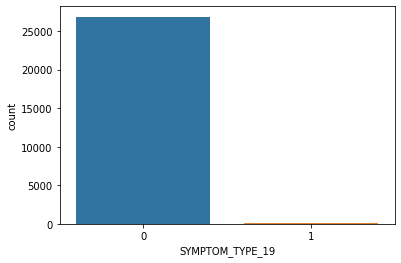

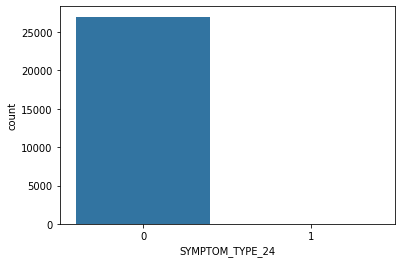

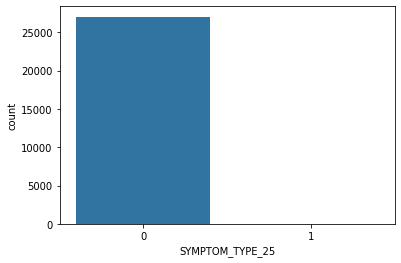

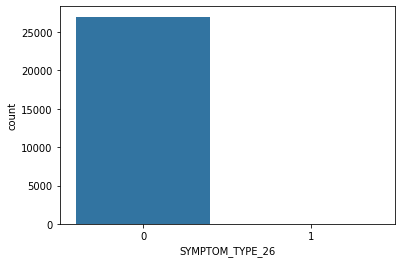

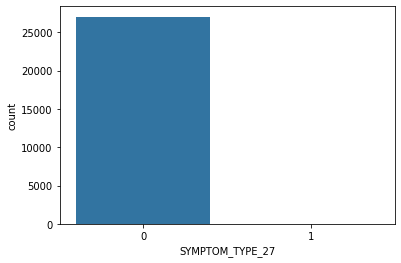

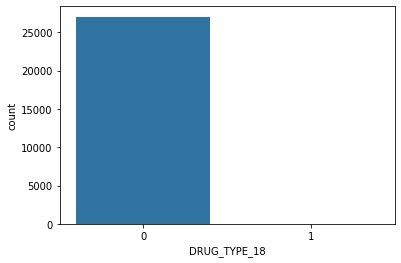

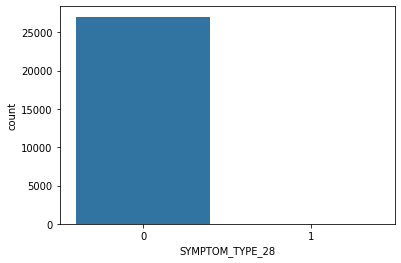

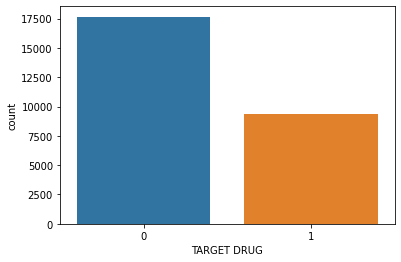

In [ ]:
for column in df_grouped.columns[1:]:
    sns.countplot(x=column, data=df_grouped)
    plt.show()


In [ ]:

df_grouped.corr()['Target']

Target               1.000000
PRIMARY_DIAGNOSIS         NaN
SYMPTOM_TYPE_0       0.094158
DRUG_TYPE_0          0.006322
DRUG_TYPE_1          0.056482
DRUG_TYPE_2          0.089157
TEST_TYPE_0          0.043374
DRUG_TYPE_3          0.178901
DRUG_TYPE_4         -0.075330
DRUG_TYPE_5         -0.015956
DRUG_TYPE_6          0.092047
DRUG_TYPE_8          0.008465
DRUG_TYPE_7          0.040666
SYMPTOM_TYPE_1       0.071296
DRUG_TYPE_10         0.097720
SYMPTOM_TYPE_29     -0.046314
SYMPTOM_TYPE_2       0.025727
DRUG_TYPE_11         0.083599
DRUG_TYPE_9          0.135726
DRUG_TYPE_13         0.046953
SYMPTOM_TYPE_5       0.030211
TEST_TYPE_1          0.063176
SYMPTOM_TYPE_6       0.053864
TEST_TYPE_2          0.117671
SYMPTOM_TYPE_3       0.010539
SYMPTOM_TYPE_8       0.017620
DRUG_TYPE_14         0.012793
DRUG_TYPE_12         0.047246
SYMPTOM_TYPE_9       0.050767
SYMPTOM_TYPE_10      0.024010
SYMPTOM_TYPE_7       0.075965
SYMPTOM_TYPE_11      0.019639
TEST_TYPE_3          0.085644
DRUG_TYPE_

In [ ]:
#DRUG_TYPE_3,DRUG_TYPE_9,TEST_TYPE_2,TARGET DRUG,SYMPTOM_TYPE_0,DRUG_TYPE_2,TEST_TYPE_3,DRUG_TYPE_15,DRUG_TYPE_6,DRUG_TYPE_10

In [ ]:
df_grouped['TARGET DRUG'].value_counts()

0    17659
1     9374
Name: TARGET DRUG, dtype: int64

In [ ]:
# Create an empty DataFrame with the desired column name
df2 = pd.DataFrame(columns=['Target'])

In [ ]:
df2['Target'] = df_grouped['Target']

In [ ]:
X = df_grouped.drop(['Target'], axis = 1) #array of features
y = df2['Target']#array of targets
     

In [ ]:
def balance_data(X, y):

  smt = SMOTEENN(sampling_strategy='all')
  X_smt, y_smt = smt.fit_resample(X, y)
  return X_smt, y_smt

X = df_grouped.drop(['Target'], axis = 1) #array of features
y = df2['Target']#array of targets

X_smt, y_smt = balance_data(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=0)

In [ ]:
0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1

In [ ]:
0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,2,2.02,2.04

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.990829586092129  Cross-Val score :  0.990829577076387
Learning rate :  0.02  Train score :  0.990829586092129  Cross-Val score :  0.990829577076387
Learning rate :  0.03  Train score :  0.990829586092129  Cross-Val score :  0.990829577076387
Learning rate :  0.04  Train score :  0.990829586092129  Cross-Val score :  0.990829577076387
Learning rate :  0.05  Train score :  0.990829586092129  Cross-Val score :  0.990829577076387
Learning rate :  0.06  Train score :  0.9908649930956344  Cross-Val score :  0.990829577076387
Learning rate :  0.07  Train score :  0.9909004000991396  Cross-Val score :  0.990829577076387
Learning rate :  0.08  Train score :  0.9909712141061502  Cross-Val score :  0.990829577076387
Learning rate :  0.09  Train score :  0.9910066211096555  Cross-Val score :  0.9908649753064754
Learning rate :  0.1  Train score :  0.9910066211096555  Cross-Val score :  0.9909003860713479
Learning rate :  0.11  Train score :  0.99107743511666

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.13, n_estimators=100)
model.fit(x_train,y_train) #train the model
model.score(x_test, y_test) # scoring the model

0.9907945050276165

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
xgb_score = f1_score(y_test,y_pred)
xgb_score

0.9917794359428355